<a href="https://colab.research.google.com/github/niklasgrimm98/Digital-Organization/blob/main/homework_4_niklas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory

In the following assignment, your task is to complete the MNIST Basics chapter. It is best to repeat everything from last week and try to answer the following questions. Afterwards you have to summarize the learned facts with two programming tasks.

What is "torch.cat()" and ".view(-1, 28*28)" doing in the beginning of the "The MNIST Loss Function" chapter?

The torch.cat transforms the object from a list of matrices to a list of vecotrs. It changes th shape of the tensor from rank-3 to a rank-2 tensor. 


Can you draw the neuronal network, which is manually trained in chapter "The MNIST Loss Function"?




Why is it not possible to use the accuracy as loss function?

Since changing the weights only a little bit will often not change the accuracy of the predictions, it cannot be used as the loss function. We need a more fine grained scale, so a slightly different weight gives us a slightly better prediction. 

What is the defined `mnist_loss` function doing? 

The funtion mnist_loss return the mean of how distant the predictions are from the actual values. So if the acutal value is a 3 with how much confidence does the model predict it to be a 3. 


```
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
```

Why do we need additionaly the sigmoid() function? What is it technically in our TLU?

The sigmoid function is our activation function. It transform all input values and smoothes them into an output value between 0 and 1. 

Again, what are mini batches, why are we using them and why should they be shuffeld? 

Since calculating the loss over the whole dataset is to time-consuming and calculating it for only one item does not result in a lot if information, we calculate it using a mini-batch. We shuffle the dataset on every epoch to vary things during the training process in order to get better generalization. 




#Practical Part

Try to understand all parts of the code needed to manually train a single TLU/Perceptron, so use and copy all parts of the code from "First Try: Pixel Similarity" to the "Putting it all together" chapter. In the second step, use an optimizer, a second layer, and a ReLU as a hidden activation function to train a simple neural network. When copying the code, think carefully about what you really need and how you can summarize it as compactly as possible. (Probably each attempt requires about 15 lines of code.)

In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *
from fastbook import *
fastbook.setup_book()
from sklearn.model_selection import train_test_split


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [79]:
#YOUR TASK: Manually train a single layer perceptron without using an optimizer.

matplotlib.rc('image', cmap='Greys')
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

ones = ((path/'training'/'1').ls() + (path/'testing'/'1').ls()).sorted()
sevens = ((path/'training'/'7').ls() + (path/'testing'/'7').ls()).sorted()

valid_1_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'1').ls()])
valid_1_tens = valid_1_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

one_tensors = [tensor(Image.open(o)) for o in ones]
seven_tensors = [tensor(Image.open(o)) for o in sevens]

stacked_ones = torch.stack(one_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

ones_train, ones_test = train_test_split(stacked_ones, test_size=0.2, random_state = 10)
sevens_train, sevens_test = train_test_split(stacked_sevens, test_size=0.2, random_state = 10)

In [89]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

def linear1(xb): return xb@weights + bias


def sigmoid(x): return 1/(1+torch.exp(-x))

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

def train_epoch2(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

def train_model(model, epochs):
    for i in range(epochs):
        train_epoch2(model)
        print(validate_epoch(model), end=' ')

def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [85]:
train_x = torch.cat([stacked_ones, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(ones) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

valid_x = torch.cat([valid_1_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_1_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

weights = init_params((28*28,1))
bias = init_params(1)

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape
valid_dl = DataLoader(valid_dset, batch_size=256)


lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9451 0.9668 0.9768 0.9803 0.9807 0.983 0.9843 0.9847 0.9851 0.986 0.9869 0.9877 0.9877 0.9885 0.988 0.9884 0.9884 0.9889 0.9889 0.9893 

In [90]:
#YOUR TASK: Train a simple two-layer neural network (two perceptrons + hidden activation function) with built-in functions and an optimizer.

linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape,b.shape

opt = BasicOptim(linear_model.parameters(), lr)


train_model(linear_model, 20)

linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

dls = DataLoaders(dl, valid_dl)

0.6632 0.898 0.9618 0.9759 0.9855 0.9877 0.9903 0.9907 0.9916 0.9924 0.992 0.992 0.992 0.992 0.992 0.9924 0.9929 0.9924 0.9924 0.9924 0.6528 0.8989 0.9605 0.9765 0.9855 0.9885 0.9903 0.9911 0.992 0.9924 0.9924 0.992 0.992 0.992 0.992 0.9924 0.9929 0.9929 0.9929 0.9929 

In [91]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)


simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.224414,0.349287,0.556172,00:00
1,0.091451,0.130336,0.947295,00:00
2,0.047754,0.061737,0.980120,00:00
3,0.031099,0.040592,0.986593,00:00
4,0.023812,0.031038,0.988904,00:00
5,0.020096,0.025684,0.990291,00:00
6,0.017883,0.022270,0.990291,00:00
7,0.016376,0.019910,0.990291,00:00
8,0.015246,0.018181,0.990754,00:00
9,0.014348,0.016854,0.990291,00:00


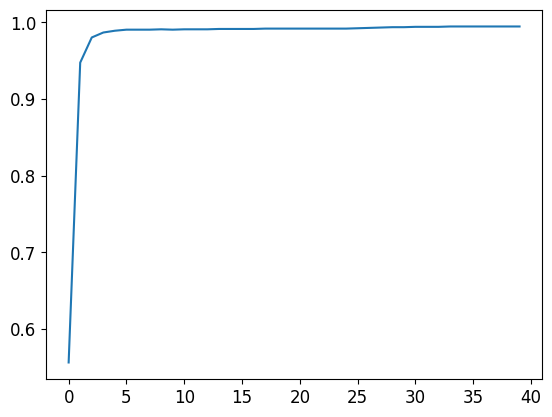

In [92]:
plt.plot(L(learn.recorder.values).itemgot(2));